In [2]:
import pandas as pd
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import string
import os
import cv2

In [3]:
#import emnist dataset
data_train_path = 'emnist-balanced-train.csv'
data_test_path = 'emnist-balanced-test.csv'
df_train = pd.read_csv(data_train_path, header = None)
df_test = pd.read_csv(data_test_path, header = None)

In [4]:
# Process data
labels = df_train[0]
df_train = df_train.iloc[: , 1:]
test_labels = df_test[0]
df_test = df_test.iloc[: , 1:]
df_train[df_train >= 120] = 255
df_train[df_train < 120] = 0
df_test[df_test >= 120] = 255
df_test[df_test < 120] = 0

In [8]:
# Set up gridsearch algorithm to loop through all 50 parameters and weights
parameters = {"n_neighbors": range(1, 50),"weights": ["uniform", "distance"],}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(df_train, labels)


KeyboardInterrupt: 

In [10]:
# Simple KNN model to test accuracy compared to gridsearch method
knn_model = KNeighborsClassifier(n_neighbors=1,weights='uniform')
knn_model.fit(df_train,labels)


KNeighborsClassifier(n_neighbors=1)

In [11]:
 # Test accuracy for simple KNN model
alphabet = list(string.ascii_uppercase)
characters = [0,1,2,3,4,5,6,7,8,9]+alphabet+["a","b","d","e","f","g","h","n","q","r","t"]
pred = knn_model.predict(df_test)
count = 0
for i in range(len(pred)):
    if pred[i] == test_labels[i]:
        count = count + 1
print('EMNIST Testing Accuracy: ' + str(count/len(pred)*100))

EMNIST Testing Accuracy: 74.06914893617021


In [18]:
# Test EMNIST accuracy for gridsearch model
pred_grid = gridsearch.predict(df_test)
count = 0
for i in range(len(pred_grid)):
    if pred_grid[i] == test_labels[i]:
        count = count + 1
print('EMNIST Testing Accuracy: ' + str(count/len(pred_grid)*100))

EMNIST Testing Accuracy: 76.54255319148936


In [6]:
# Obtain license plate character images, binarize, and flatten into a single array. 
# Append to test array. Each row of test array has a license plate character data
c_dir = r"C:\Users\aksha\OneDrive\Desktop\Desktop\Fall 2022\Introduction to ML and AI\Project\Split_Characters\split_1MA625"
test_d = []
count = 0
for character_file in os.listdir(c_dir):
    os.chdir(c_dir)
    print(character_file)
    image = cv2.imread(character_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_rd = gray.flatten()
    #print(img_rd.T)
    if count == 0:
        test_d = img_rd.T
        count = count+1
    else:
        test_d = np.vstack([test_d, img_rd.T])
print(np.shape(test_d))



ROI_0.png
ROI_1.png


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2060 and the array at index 1 has size 7500

In [7]:
# Predict the license character using the model
pred_own = gridsearch.predict(test_d)
for i in range(len(pred_own)):
    c = int(pred_own[i])
    pred_char = characters[c]
    print(pred_char)


ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 ... 0 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [7]:
# Compute EMNIST test accuracy for different n neighbors parameters
neighbors_accuracy_list = [] 
n_neighbor = np.linspace(2,50,25)
for i in n_neighbor:
    knn_model = KNeighborsClassifier(n_neighbors=int(i),weights='uniform')
    knn_model.fit(df_train,labels)
    alphabet = list(string.ascii_uppercase)
    characters = [0,1,2,3,4,5,6,7,8,9]+alphabet+["a","b","d","e","f","g","h","n","q","r","t"]
    pred = knn_model.predict(df_test)
    count = 0
    for i in range(len(pred)):
        if pred[i] == test_labels[i]:
            count = count + 1
    print('EMNIST Testing Accuracy: ' + str(count/len(pred)*100))
    neighbors_accuracy_list.append(count/len(pred)*100)
        

EMNIST Testing Accuracy: 72.9095744680851
EMNIST Testing Accuracy: 75.84042553191489
EMNIST Testing Accuracy: 75.98404255319149
EMNIST Testing Accuracy: 75.99468085106383
EMNIST Testing Accuracy: 75.78191489361701
EMNIST Testing Accuracy: 75.74468085106383
EMNIST Testing Accuracy: 75.51595744680851
EMNIST Testing Accuracy: 75.31914893617021
EMNIST Testing Accuracy: 75.09042553191489
EMNIST Testing Accuracy: 74.89893617021278
EMNIST Testing Accuracy: 74.82446808510639
EMNIST Testing Accuracy: 74.38297872340426
EMNIST Testing Accuracy: 74.27127659574468
EMNIST Testing Accuracy: 74.05319148936171
EMNIST Testing Accuracy: 73.87765957446808
EMNIST Testing Accuracy: 73.73404255319149
EMNIST Testing Accuracy: 73.52659574468086
EMNIST Testing Accuracy: 73.30851063829788
EMNIST Testing Accuracy: 73.25531914893617
EMNIST Testing Accuracy: 73.04255319148936
EMNIST Testing Accuracy: 72.91489361702128
EMNIST Testing Accuracy: 72.83510638297872
EMNIST Testing Accuracy: 72.6968085106383
EMNIST Testin

Text(0, 0.5, 'Accuracy (%)')

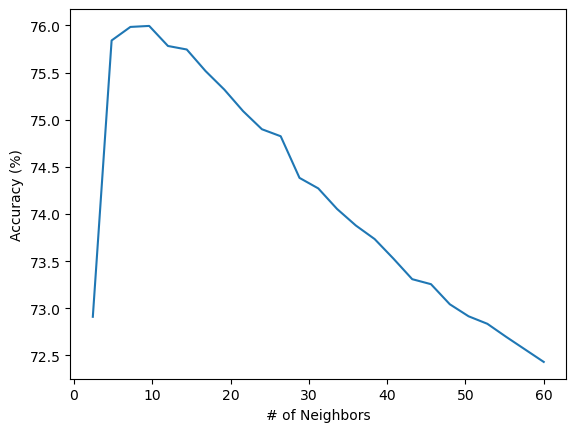

In [15]:
plt.plot(n_neighbor,neighbors_accuracy_list)
plt.xlabel('# of Neighbors')
plt.ylabel('Accuracy (%)')